# Part One: Importing data & Preliminary Analysis

In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [124]:
data = pd.read_csv('project2.data')

In [125]:
print(f'{data.shape}\n{data.size}')

(286, 10)
2860


In [126]:
data.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [127]:
# renamed Column to fix typo & Add clarity to variable names
data = data.rename(columns={'irradiat': 'Irradiated','class': 'Recurrence' })
data.info()
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Recurrence   286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   Irradiated   286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB
Recurrence     0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
Irradiated     0
dtype: int64


We see that a large majority of the datatypes are objects, this means we must do data type conversion for better use! In addition to this, we also see that have no null values! This is good, but that doesn't mean every value in our data is a good value.

## Data Pre-Processing & Data Tidying

In [128]:
# Indentifies all the unique values within our columns
for col in data:
    print(f'{col}: {data[col].unique()}\n')

Recurrence: ['no-recurrence-events' 'recurrence-events']

age: ['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']

menopause: ['premeno' 'ge40' 'lt40']

tumor-size: ['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']

inv-nodes: ['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']

node-caps: ['no' 'yes' '?']

deg-malig: [3 2 1]

breast: ['left' 'right']

breast-quad: ['left_low' 'right_up' 'left_up' 'right_low' 'central' '?']

Irradiated: ['no' 'yes']



## Finding 'Bad' Values

In [129]:
data.loc[data['breast-quad'] == '?']

,Recurrence,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,Irradiated
206,recurrence-events,50-59,ge40,30-34,0-2,no,3,left,?,no


In [130]:
data.loc[data['node-caps'] == '?']

,Recurrence,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,Irradiated
145,no-recurrence-events,40-49,premeno,25-29,0-2,?,2,left,right_low,yes
163,no-recurrence-events,60-69,ge40,25-29,3-5,?,1,right,left_up,yes
164,no-recurrence-events,60-69,ge40,25-29,3-5,?,1,right,left_low,yes
183,no-recurrence-events,50-59,ge40,30-34,9-11,?,3,left,left_up,yes
184,no-recurrence-events,50-59,ge40,30-34,9-11,?,3,left,left_low,yes
233,recurrence-events,70-79,ge40,15-19,9-11,?,1,left,left_low,yes
263,recurrence-events,50-59,lt40,20-24,0-2,?,1,left,left_up,no
264,recurrence-events,50-59,lt40,20-24,0-2,?,1,left,left_low,no


## Converting Data Types

In [131]:
# converts the yes's to 1's & the no's to 0's.
data['Irradiated'] = data['Irradiated'].map({'yes': 1, 'no': 0})
# converts the right to 1's & the left to 0's.
data['breast'] = data['breast'].map({'right': 1, 'left': 0})
# Remaps the Recurrence variable to a boolean, where false indicates no recurrence & true indiactes a recurrence
data['Recurrence'] = data['Recurrence'].map({'no-recurrence-events': False, 'recurrence-events': True})

In [132]:
print(f'{data["breast-quad"].value_counts()}\n{data["node-caps"].value_counts()}')

breast-quad
left_low     110
left_up       97
right_up      33
right_low     24
central       21
?              1
Name: count, dtype: int64
node-caps
no     222
yes     56
?        8
Name: count, dtype: int64


In [133]:
data.loc[data['breast-quad'] == '?', 'breast-quad'] = 'left_low'
data.loc[data['node-caps'] == '?', 'node-caps'] = 'no'
# converts the yes's to 1's & the no's to 0's.
data['node-caps'] = data['node-caps'].map({'yes': 1, 'no': 0})

Changed '?' variables, or bad values, to that of the most common within that column as a way to promote valid replacement. 

### Performing One-Hot Encoding

In [134]:
# Converts the three uniuqe values in the 'menopause' column to booleans 
data = pd.get_dummies(data, columns=["menopause"], drop_first=True)
# Converts each range of ages to a boolean 
data = pd.get_dummies(data, columns=["age"], drop_first=True)
# Converts each range of tumor sizes to a boolean set
data = pd.get_dummies(data, columns=["tumor-size"], drop_first=True)
# Converts each range of nodes to a boolean set
data = pd.get_dummies(data, columns=["inv-nodes"], drop_first=True)
# Converts each breast quadrant to a boolean set
data = pd.get_dummies(data, columns=["breast-quad"], drop_first=True)

## Post-Processed Data

In [135]:
data.head()

,Recurrence,node-caps,deg-malig,breast,Irradiated,menopause_lt40,menopause_premeno,age_30-39,age_40-49,age_50-59,...,inv-nodes_12-14,inv-nodes_15-17,inv-nodes_24-26,inv-nodes_3-5,inv-nodes_6-8,inv-nodes_9-11,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up
0,False,0,3,0,0,False,True,True,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,0,2,1,0,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,True
2,False,0,2,0,0,False,True,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,0,2,1,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,0,2,1,0,False,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Recurrence             286 non-null    bool 
 1   node-caps              286 non-null    int64
 2   deg-malig              286 non-null    int64
 3   breast                 286 non-null    int64
 4   Irradiated             286 non-null    int64
 5   menopause_lt40         286 non-null    bool 
 6   menopause_premeno      286 non-null    bool 
 7   age_30-39              286 non-null    bool 
 8   age_40-49              286 non-null    bool 
 9   age_50-59              286 non-null    bool 
 10  age_60-69              286 non-null    bool 
 11  age_70-79              286 non-null    bool 
 12  tumor-size_10-14       286 non-null    bool 
 13  tumor-size_15-19       286 non-null    bool 
 14  tumor-size_20-24       286 non-null    bool 
 15  tumor-size_25-29       286 non-null    b

In [137]:
print(f'{data.describe()}\n{data.shape}\n{data.size}')

        node-caps   deg-malig      breast  Irradiated
count  286.000000  286.000000  286.000000  286.000000
mean     0.195804    2.048951    0.468531    0.237762
std      0.397514    0.738217    0.499883    0.426459
min      0.000000    1.000000    0.000000    0.000000
25%      0.000000    2.000000    0.000000    0.000000
50%      0.000000    2.000000    0.000000    0.000000
75%      0.000000    3.000000    1.000000    0.000000
max      1.000000    3.000000    1.000000    1.000000
(286, 32)
9152


## Data Visualization

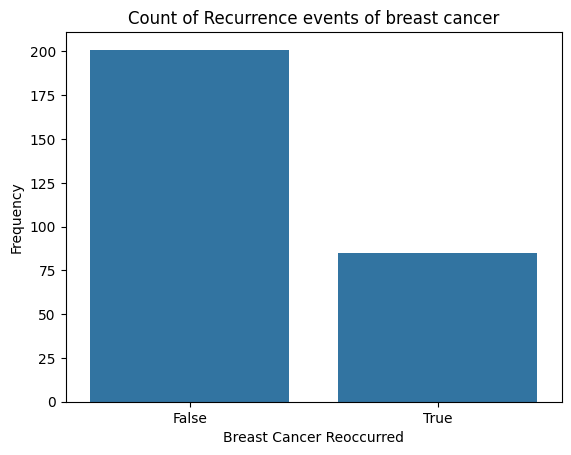

In [138]:
fig = sns.countplot(data = data, x = 'Recurrence')
fig.set(xlabel = 'Breast Cancer Reoccurred', ylabel = 'Frequency',
        title = 'Count of Recurrence events of breast cancer')
plt.show()

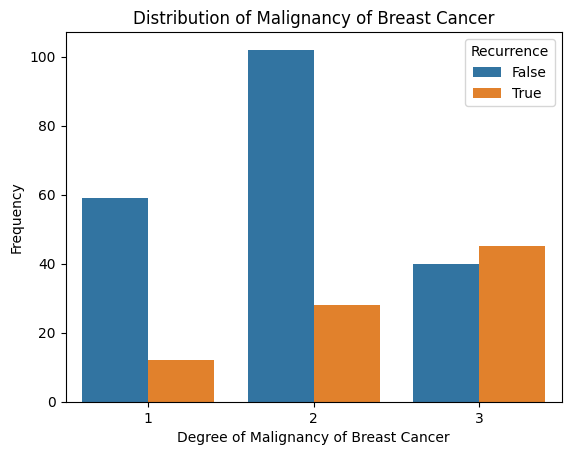

In [139]:
fig = sns.countplot(data = data, x = 'deg-malig', hue = 'Recurrence')
fig.set(xlabel = 'Degree of Malignancy of Breast Cancer',
        ylabel = 'Frequency',
        title = 'Distribution of Malignancy of Breast Cancer')
plt.show()

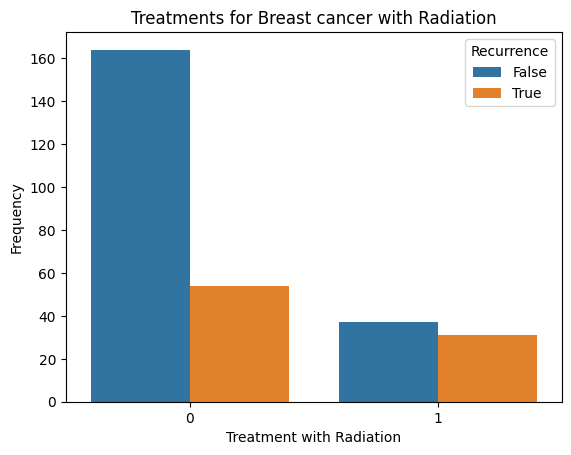

In [140]:
fig = sns.countplot(data = data, x = 'Irradiated', hue = 'Recurrence')
fig.set(xlabel = 'Treatment with Radiation', ylabel = 'Frequency',
        title = 'Treatments for Breast cancer with Radiation')
plt.show()

# Part Two: ML Model Development, testing & comparison

### Construction of Testing & Training Data

In [141]:
from sklearn.model_selection import train_test_split
X = data.drop(['Recurrence'], axis = 1)
Y = data['Recurrence']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3, stratify = Y, random_state = 1)
print(f'Training Data: {X_train.shape}\nTesting Data: {X_test.shape}')

Training Data: (200, 31)
Testing Data: (86, 31)


### Logistic Regression Model

In [142]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss = 'perceptron', alpha = 0.05)
clf.fit(X_train,Y_train)
accuracy_test = accuracy_score(Y_test, clf.predict(X_test))
accuracy_train = accuracy_score(Y_train, clf.predict(X_train))

Train accuracy: 0.725; 
Test accuracy: 0.6046511627906976


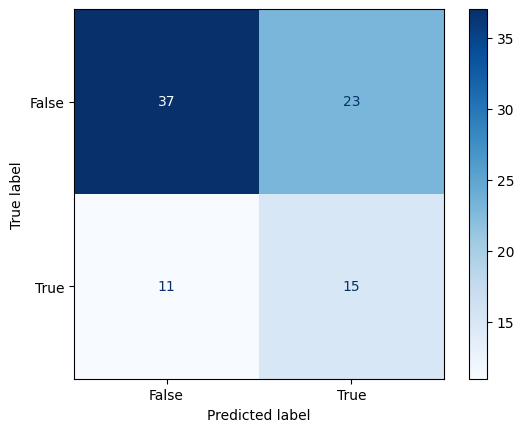

In [143]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay.from_estimator(clf, X_test, Y_test,
                                               cmap=plt.cm.Blues,normalize=None)
# Check the accuracy on the test data
accuracy_test=accuracy_score(Y_test, clf.predict(X_test))
# Check accuracy on the training data
accuracy_train=accuracy_score(Y_train, clf.predict(X_train))
print(f"Train accuracy: {accuracy_train}; \nTest accuracy: {accuracy_test}")

In [144]:
print(f"Performance on TEST\n*******************\n{classification_report(Y_test, clf.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(Y_train, clf.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.77      0.62      0.69        60
        True       0.39      0.58      0.47        26

    accuracy                           0.60        86
   macro avg       0.58      0.60      0.58        86
weighted avg       0.66      0.60      0.62        86

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.89      0.70      0.78       141
        True       0.52      0.80      0.63        59

    accuracy                           0.73       200
   macro avg       0.71      0.75      0.71       200
weighted avg       0.78      0.72      0.74       200



### KNN Model

In [145]:
from sklearn.neighbors import KNeighborsClassifier
# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model to the training set
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [146]:
from sklearn.metrics import recall_score, precision_score, f1_score
accuracy_test=accuracy_score(Y_test, knn.predict(X_test))
print('Accuracy of knn on test data is : {:.2}'.format(accuracy_test))

# Check accuracy on the training data
accuracy_train=accuracy_score(Y_train, knn.predict(X_train))
print('Accuracy of knn on train data is : {:.2}'.format(accuracy_train))

# on test data
recall_test=recall_score(Y_test, knn.predict(X_test))
print(f'Recall of {knn} on test data is : {recall_test}')
# on training data
recall_train=recall_score(Y_train, knn.predict(X_train))
print(f'Recall of {knn} on train data is : {recall_train}')

Accuracy of knn on test data is : 0.69
Accuracy of knn on train data is : 0.86
Recall of KNeighborsClassifier(n_neighbors=3) on test data is : 0.38461538461538464
Recall of KNeighborsClassifier(n_neighbors=3) on train data is : 0.5932203389830508


#### Improving KNN model

In [147]:
from sklearn.model_selection import GridSearchCV
knn_search_recall = KNeighborsClassifier()
# Optimizing Hyperparamter
param_grid = {"n_neighbors": np.arange(1, 100)}
# cv parameter stands for cross-validation generator
knn_gscv = GridSearchCV(knn_search_recall, param_grid, cv=5)
knn_gscv.fit(X_train,Y_train)
best_knn = knn_gscv.best_estimator_

In [148]:
knn_search_recall = KNeighborsClassifier()
# specify the recall function to use when scoring
knn_gscv2 = GridSearchCV(knn_search_recall, param_grid, cv=5, scoring="recall")

# rest of the code is same as above ---
# fit the set of models
knn_gscv2.fit(X_train, Y_train)

# hyperparameter values for the best model
knn_gscv2.best_params_
best_recall_knn = knn_gscv2.best_estimator_

In [149]:
models = [knn, best_knn, best_recall_knn]
for m in models:
    # Recall
    # on test data
    recall_test=recall_score(Y_test, m.predict(X_test))
    accuracy_test=accuracy_score(Y_test, m.predict(X_test))
    print(f'Accuracy of {m} on test data is : {accuracy_test}')
    print(f'Recall of {m} on test data is : {recall_test}\n')
    # on training data
    recall_train=recall_score(Y_train, m.predict(X_train))
    accuracy_test=accuracy_score(Y_train, m.predict(X_train))
    print(f'Accuracy of {m} on train data is : {accuracy_train}')
    print(f'Recall of {m} on train data is : {recall_train}\n')

Accuracy of KNeighborsClassifier(n_neighbors=3) on test data is : 0.686046511627907
Recall of KNeighborsClassifier(n_neighbors=3) on test data is : 0.38461538461538464

Accuracy of KNeighborsClassifier(n_neighbors=3) on train data is : 0.86
Recall of KNeighborsClassifier(n_neighbors=3) on train data is : 0.5932203389830508

Accuracy of KNeighborsClassifier(n_neighbors=14) on test data is : 0.6976744186046512
Recall of KNeighborsClassifier(n_neighbors=14) on test data is : 0.038461538461538464

Accuracy of KNeighborsClassifier(n_neighbors=14) on train data is : 0.86
Recall of KNeighborsClassifier(n_neighbors=14) on train data is : 0.15254237288135594

Accuracy of KNeighborsClassifier(n_neighbors=1) on test data is : 0.5813953488372093
Recall of KNeighborsClassifier(n_neighbors=1) on test data is : 0.23076923076923078

Accuracy of KNeighborsClassifier(n_neighbors=1) on train data is : 0.86
Recall of KNeighborsClassifier(n_neighbors=1) on train data is : 0.9152542372881356



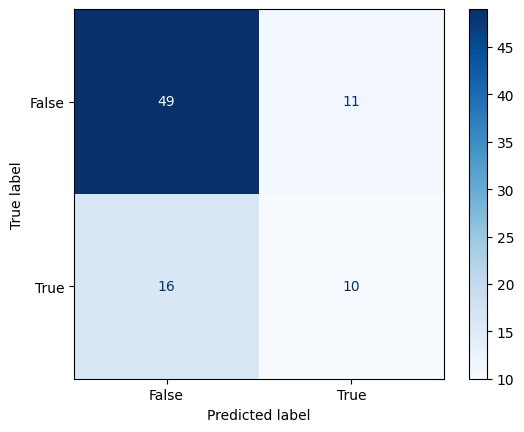

In [150]:
cm_display = ConfusionMatrixDisplay.from_estimator(knn, X_test, Y_test,
                                               cmap=plt.cm.Blues,normalize=None)

In [151]:
print(f"Performance on TEST\n*******************\n{classification_report(Y_test, knn.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(Y_train, knn.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.75      0.82      0.78        60
        True       0.48      0.38      0.43        26

    accuracy                           0.69        86
   macro avg       0.62      0.60      0.60        86
weighted avg       0.67      0.69      0.68        86

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.85      0.97      0.91       141
        True       0.90      0.59      0.71        59

    accuracy                           0.86       200
   macro avg       0.87      0.78      0.81       200
weighted avg       0.86      0.86      0.85       200



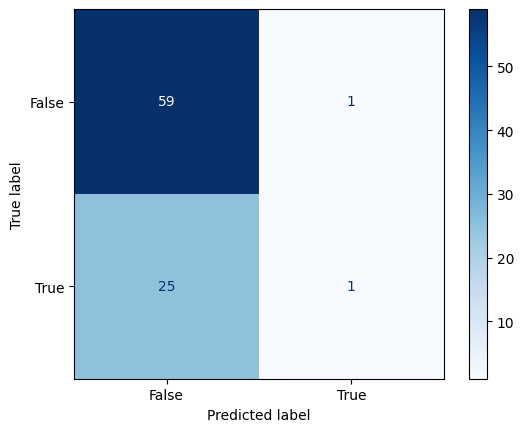

In [152]:
cm_display = ConfusionMatrixDisplay.from_estimator(best_knn, X_test, Y_test,
                                               cmap=plt.cm.Blues,normalize=None)

In [153]:
print(f"Performance on TEST\n*******************\n{classification_report(Y_test, best_knn.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(Y_train, best_knn.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.70      0.98      0.82        60
        True       0.50      0.04      0.07        26

    accuracy                           0.70        86
   macro avg       0.60      0.51      0.45        86
weighted avg       0.64      0.70      0.59        86

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.74      0.99      0.85       141
        True       0.90      0.15      0.26        59

    accuracy                           0.74       200
   macro avg       0.82      0.57      0.55       200
weighted avg       0.78      0.74      0.67       200



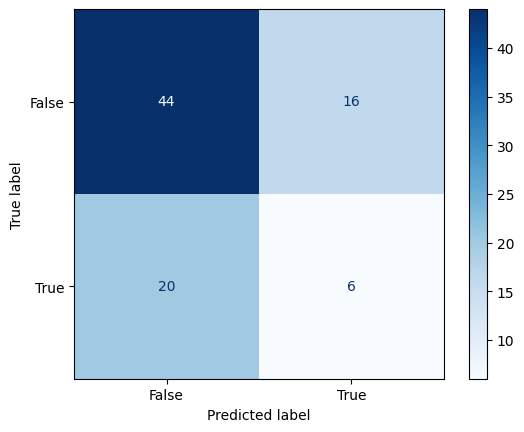

In [154]:
cm_display = ConfusionMatrixDisplay.from_estimator(best_recall_knn, X_test, Y_test,
                                               cmap=plt.cm.Blues,normalize=None)

In [155]:
print(f"Performance on TEST\n*******************\n{classification_report(Y_test, best_recall_knn.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(Y_train, tree_model.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.69      0.73      0.71        60
        True       0.27      0.23      0.25        26

    accuracy                           0.58        86
   macro avg       0.48      0.48      0.48        86
weighted avg       0.56      0.58      0.57        86

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       141
        True       1.00      0.90      0.95        59

    accuracy                           0.97       200
   macro avg       0.98      0.95      0.96       200
weighted avg       0.97      0.97      0.97       200



### Decision Trees

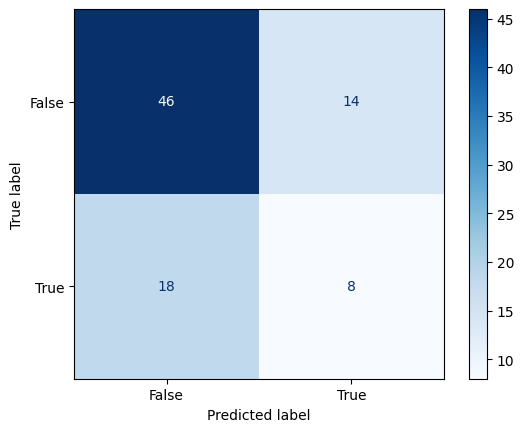

In [156]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=1).fit(X_train, Y_train)
cm_display = ConfusionMatrixDisplay.from_estimator(tree_model, X_test, Y_test,
                                               cmap=plt.cm.Blues,normalize=None)

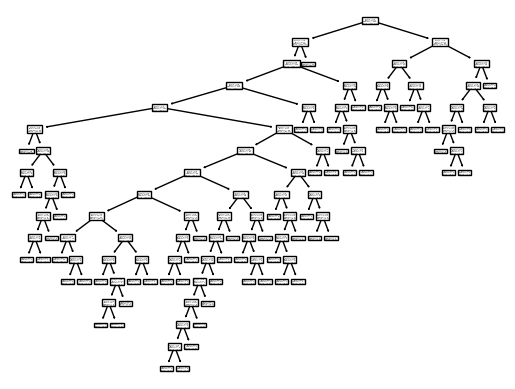

In [166]:
from sklearn import tree
tree.plot_tree(tree_model)
plt.show()

In [158]:
print(f"Performance on TEST\n*******************\n{classification_report(Y_test, tree_model.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(Y_train, tree_model.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.72      0.77      0.74        60
        True       0.36      0.31      0.33        26

    accuracy                           0.63        86
   macro avg       0.54      0.54      0.54        86
weighted avg       0.61      0.63      0.62        86

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       141
        True       1.00      0.90      0.95        59

    accuracy                           0.97       200
   macro avg       0.98      0.95      0.96       200
weighted avg       0.97      0.97      0.97       200

